# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

### Получение общей информации о данных

Прочитаем датафрейм из файла и посмотрим общую информацию, начало и конец датафрейма

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Таблица содержит 23699 строк и 22 столбца

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


При первоначальном осмотре данных выявлены следующие проблемы:
* Некоторые столбцы имеют некорректные названия (например, cityCenters_nearest)
* Порядок столбцов неудобен для просмотра (например, столбцы с площадью разнесены далеко друг от друга)
* Типы данных требуют изменения (например, столбцы first_day_exposition и is_apartment имеют тип object)
* Встречаются пропущенные данные (например, в столбце is_apartment всего 2775 записей)
* Возможно, встречаются дубликаты (вероятно, в столбце locality_name)

### Изменение названий и порядка столбцов

Некоторые колонки имеют некорректные названия, лучше их привести к "змеиному регистру"

In [6]:
df.rename(columns = 
          {'cityCenters_nearest' : 'city_centers_nearest', 
           'parks_around3000' : 'parks_around_3000', 
           'ponds_around3000' : 'ponds_around_3000'
          }, inplace = True)

Также имеет смысл поменять порядок столбцов для лучшего визуального восприятия информации

In [7]:
df = df.reindex(columns=['locality_name', 'last_price', 'first_day_exposition', 'days_exposition', 'total_images',
                         'rooms', 'floor', 'floors_total', 'total_area', 'living_area', 'kitchen_area', 
                         'studio', 'is_apartment', 'open_plan', 'ceiling_height', 'balcony', 
                         'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 
                         'ponds_around_3000', 'ponds_nearest'])

In [8]:
df.head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
0,Санкт-Петербург,13000000.0,2019-03-07T00:00:00,NaN,20,3,8,16.0,108.0,51.0,...,NaN,False,2.70,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3350000.0,2018-12-04T00:00:00,81.0,7,1,1,11.0,40.4,18.6,...,NaN,False,NaN,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5196000.0,2015-08-20T00:00:00,558.0,10,2,4,5.0,56.0,34.3,...,NaN,False,NaN,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64900000.0,2015-07-24T00:00:00,424.0,0,3,9,14.0,159.0,NaN,...,NaN,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10000000.0,2018-06-19T00:00:00,121.0,2,2,13,14.0,100.0,32.0,...,NaN,False,3.03,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0


## Предобработка данных

1. Определите и изучите пропущенные значения:
  * Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
  * Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
  * Укажите причины, которые могли привести к пропускам в данных.
2. Приведите данные к нужным типам:
  * Поясните, в каких столбцах нужно изменить тип данных и почему.

Оценим процентное соотношение пропущенных данных в каждом столбце

In [9]:
(100 * df.isna().sum().sort_values() / df.shape[0]).round(2)

last_price               0.00
first_day_exposition     0.00
open_plan                0.00
total_images             0.00
rooms                    0.00
floor                    0.00
total_area               0.00
studio                   0.00
locality_name            0.21
floors_total             0.36
living_area              8.03
kitchen_area             9.61
days_exposition         13.42
parks_around_3000       23.28
ponds_around_3000       23.28
city_centers_nearest    23.29
airports_nearest        23.38
ceiling_height          38.80
balcony                 48.61
ponds_nearest           61.56
parks_nearest           65.91
is_apartment            88.29
dtype: float64

Ряд столбцов вообще не имеет пропусков (нужно проверить, чтобы убедиться в этом)  
У некоторых столбцов число пропусков более 50%, скорее всего, если данные не указаны, подразумевается отсутствие (балконов, парков и водоемов рядом, а также квартира не является апартаментами)

### Обработка пропусков и преобразование типов данных

Проверим каждый столбец, при необходимости обработаем явные пропуски и проверим неявные пропуски. Также преобразуем типы данные там, где это целесообразно.

#### Общая информация о лоте

##### locality_name

In [10]:
df['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [11]:
len(df[df['locality_name'].isna()])

49

In [12]:
df[df['locality_name'].isna()].head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
1097,NaN,8600000.0,2016-04-15T00:00:00,147.0,3,3,2,5.0,81.7,50.8,...,NaN,False,3.55,0.0,23478.0,4258.0,0.0,NaN,0.0,NaN
2033,NaN,5398000.0,2017-05-30T00:00:00,34.0,6,3,2,4.0,80.0,42.6,...,NaN,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2603,NaN,3351765.0,2015-09-20T00:00:00,276.0,20,1,3,24.0,42.7,15.6,...,NaN,False,NaN,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0
2632,NaN,5130593.0,2015-10-11T00:00:00,256.0,2,2,21,24.0,62.4,33.1,...,NaN,False,NaN,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0
3574,NaN,4200000.0,2016-05-28T00:00:00,45.0,10,2,5,5.0,46.5,30.8,...,NaN,False,NaN,0.0,27419.0,8127.0,0.0,NaN,1.0,603.0


Так как нет возможности восстановить эти данные, но они могут мешать анализу, лучше их удалить

In [13]:
df = df.dropna(subset=['locality_name'])
len(df[df['locality_name'].isna()])

0

##### last_price

In [14]:
len(df[df['last_price'].isna()])

0

In [15]:
df['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541126.897928
std       10896399.175038
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

Пропусков нет, но есть странное значение 12190  
Посмотрим повнимательнее на эту квартиру

In [16]:
df[df['last_price'] == 12190 ]

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
8793,Санкт-Петербург,12190.0,2019-03-20T00:00:00,8.0,7,2,25,25.0,109.0,32.0,...,NaN,False,2.75,NaN,36421.0,9176.0,1.0,805.0,0.0,NaN


Кажется, это опечатка, подразумевалось 12 млн 190 тысяч

In [17]:
df.loc[(df['last_price'] == 12190), 'last_price'] = df['last_price'] * 1000

df['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541641.815899
std       10896378.367916
min         430000.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

Для удобства переведем цены в миллионы

In [18]:
df['last_price'] = df['last_price'] / 1000000
df.head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
0,Санкт-Петербург,13.000,2019-03-07T00:00:00,NaN,20,3,8,16.0,108.0,51.0,...,NaN,False,2.70,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0
1,посёлок Шушары,3.350,2018-12-04T00:00:00,81.0,7,1,1,11.0,40.4,18.6,...,NaN,False,NaN,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,5.196,2015-08-20T00:00:00,558.0,10,2,4,5.0,56.0,34.3,...,NaN,False,NaN,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0
3,Санкт-Петербург,64.900,2015-07-24T00:00:00,424.0,0,3,9,14.0,159.0,NaN,...,NaN,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0
4,Санкт-Петербург,10.000,2018-06-19T00:00:00,121.0,2,2,13,14.0,100.0,32.0,...,NaN,False,3.03,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0


##### first_day_exposition

In [19]:
len(df[df['first_day_exposition'].isna()])

0

In [20]:
df['first_day_exposition'].describe()

count                   23650
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Пропусков нет, но данные необходимо преобразовать в тип date_time

In [21]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
df['first_day_exposition'].describe()

count                   23650
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

##### days_exposition

In [22]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [23]:
len(df[df['days_exposition'].isna()])

3180

Т.к данные имеются до 3 мая 2019, возможно, значения NaN там, где объявление еще не снято с публикации  
Если квартира еще не продана, лучше не трогать эти данные, т.к может произойти искажение

##### total_images

In [24]:
len(df[df['total_images'].isna()]) #вывод количества тех строк, где есть NaN

0

In [25]:
df['total_images'].describe() #описание значений сводной статистикой

count    23650.000000
mean         9.862326
std          5.682278
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Пропусков нет

#### Основная информация о квартире

##### rooms   

In [26]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [27]:
len(df[df['rooms'].isna()])

0

Пропусков нет

##### floor

In [28]:
df['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [29]:
len(df[df['floor'].isna()])

0

Пропусков нет

##### floors_total

In [30]:
len(df[df['floors_total'].isna()])

85

In [31]:
df['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Проверим пропуски

In [32]:
df[df['floors_total'].isna()].head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
186,Санкт-Петербург,11.640000,2018-10-02,49.0,12,2,4,NaN,65.2,30.80,...,NaN,False,NaN,NaN,39197.0,12373.0,1.0,123.0,0.0,NaN
237,Санкт-Петербург,2.438033,2016-11-23,251.0,4,1,1,NaN,28.1,20.75,...,NaN,False,NaN,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0
457,Санкт-Петербург,9.788348,2015-08-01,727.0,4,2,12,NaN,70.8,38.40,...,NaN,False,NaN,0.0,37364.0,8322.0,2.0,309.0,2.0,706.0
671,Санкт-Петербург,6.051191,2017-04-06,123.0,4,3,8,NaN,93.6,47.10,...,NaN,False,NaN,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0
1757,Санкт-Петербург,3.600000,2017-04-22,77.0,5,1,9,NaN,39.0,NaN,...,NaN,False,NaN,0.0,22735.0,11618.0,1.0,835.0,1.0,652.0


Похоже, что там, где этаж не указан, он последний (или единственный)

In [33]:
df['floors_total'] = df['floors_total'].fillna(0)

df.loc[(df['floors_total'] == 0), 'floors_total'] = df['floor']

In [34]:
len(df[df['days_exposition'].isna()])

3180

Также заменим тип данных

In [35]:
df['floors_total'] = df['floors_total'].astype(int)

##### total_area

In [36]:
len(df[df['total_area'].isna()])

0

In [37]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Пропусков нет

##### living_area

In [38]:
df['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [39]:
len(df[df['living_area'].isna()])

1898

На рынке представлены как маленькие студии, так и огромные квартиры  
Но заменять пропуски нельзя, т.к есть связь между общей площадью и жилой  
Заменим пока нулем, т.к его в значениях нет

In [40]:
df['living_area'] = df['living_area'].fillna(0)

In [41]:
len(df[df['living_area'].isna()])

0

##### kitchen_area

In [42]:
df['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [43]:
len(df[df['kitchen_area'].isna()])

2269

Ситуация такая же, как с living_area  
Заменим нулем

In [44]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [45]:
len(df[df['kitchen_area'].isna()])

0

#### Дополнительная информация о квартире

##### studio

In [46]:
df['studio'].describe()

count     23650
unique        2
top       False
freq      23501
Name: studio, dtype: object

In [47]:
len(df[df['studio'].isna()])

0

Тут все хорошо

##### is_apartment

In [48]:
df['is_apartment'].describe()

count      2760
unique        2
top       False
freq       2710
Name: is_apartment, dtype: object

In [49]:
len(df[df['is_apartment'].isna()])

20890

Очень много пропусков, скорее всего, отсутствующие значения нужно заменять на False (иначе бы владельцы четко указали, что это апартаменты)  
При этом тип данных - object, т.е для преобразования в bool нужно заменить значения  
Все 'False' и NaN заменим на 0, а 'True' на 1 

In [50]:
df['is_apartment'] = df['is_apartment'].fillna(0)
df.loc[(df['is_apartment'] == 'False'), 'is_apartment'] = 0
df.loc[(df['is_apartment'] == 'True'), 'is_apartment'] = 1

Преобразуем в числовой тип с проверкой ошибок и заменой на NaN, а также проверим количество NaN после преобразования

In [51]:
df['is_apartment'] = pd.to_numeric(df['is_apartment'], errors='coerce')
len(df[df['is_apartment'].isna()])

0

Теперь можно спокойно переводить в bool

In [52]:
df['is_apartment'] = df['is_apartment'].astype(bool)

##### open_plan

In [53]:
df['open_plan'].describe()

count     23650
unique        2
top       False
freq      23583
Name: open_plan, dtype: object

In [54]:
len(df[df['open_plan'].isna()])

0

Все ок

##### ceiling_height

In [55]:
len(df[df['ceiling_height'].isna()])

9160

In [56]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Очень много пропусков, при этом есть выбивающиеся значения (1 и 100 метров)

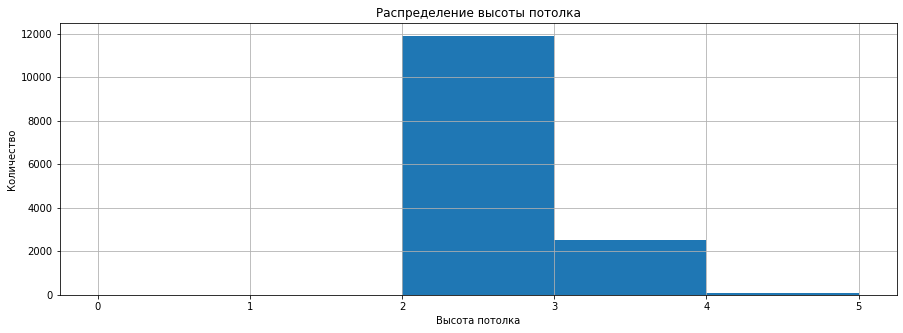

In [159]:
df['ceiling_height'].hist(bins=5, range=(0,5), figsize=(15,5))
plt.title('Распределение высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
plt.show()

Подавляющее число потолков имеют высоту от 2 до 3 метров, также есть значительная доля потолков от 3 до 4 метров

Оценим минимальные значения

In [58]:
df.sort_values(by='ceiling_height').head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
22590,Санкт-Петербург,6.0,2018-10-31,13.0,16,2,7,12,55.0,32.4,...,False,False,1.00,NaN,33053.0,14217.0,2.0,293.0,2.0,289.0
5712,городской посёлок Мга,1.5,2017-08-14,248.0,5,2,1,2,42.8,27.5,...,False,False,1.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16934,Санкт-Петербург,4.1,2017-10-17,71.0,5,1,5,37,40.0,17.4,...,False,False,1.75,NaN,18732.0,20444.0,0.0,NaN,3.0,80.0
2572,Луга,2.4,2018-12-27,NaN,4,3,4,5,62.0,40.0,...,False,False,2.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
16884,Выборг,1.5,2018-10-03,6.0,0,1,5,5,33.0,20.0,...,False,False,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df.sort_values(by='ceiling_height', ascending=False).head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
22869,Санкт-Петербург,15.000,2018-07-25,19.0,0,1,5,5,25.0,14.0,...,True,False,100.0,5.0,34963.0,8283.0,1.0,223.0,3.0,30.0
3148,Волхов,2.900,2018-11-12,NaN,14,3,2,3,75.0,53.0,...,False,False,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,Санкт-Петербург,9.999,2019-04-05,NaN,19,2,5,6,92.4,55.5,...,False,False,32.0,4.0,18838.0,3506.0,0.0,NaN,3.0,511.0
21377,Санкт-Петербург,4.900,2017-04-18,61.0,19,1,19,24,42.0,37.7,...,False,False,27.5,2.0,42742.0,9760.0,0.0,NaN,0.0,NaN
17857,Санкт-Петербург,3.900,2017-12-22,73.0,1,3,4,5,56.0,33.0,...,False,False,27.0,NaN,41030.0,15543.0,0.0,NaN,0.0,NaN


Значения ниже двух метров и 100 метров следует заменить медианным значением как ошибочные

In [60]:
median_h = df['ceiling_height'].median()

df.loc[(df['ceiling_height'] < 2), 'ceiling_height'] = median_h
df.loc[(df['ceiling_height'] == 100), 'ceiling_height'] = median_h

In [61]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.764845
std          0.968848
min          2.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

Теперь минимальное значение 2 метра, максимальное 32

In [62]:
len(df.query('ceiling_height == 2'))

11

Заменим значение 2 на медианное, видимо, это ошибка

In [63]:
df.loc[(df['ceiling_height'] == 2), 'ceiling_height'] = median_h

In [64]:
df.sort_values(by='ceiling_height', ascending=False).head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
3148,Волхов,2.900,2018-11-12,NaN,14,3,2,3,75.0,53.0,...,False,False,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,Санкт-Петербург,9.999,2019-04-05,NaN,19,2,5,6,92.4,55.5,...,False,False,32.0,4.0,18838.0,3506.0,0.0,NaN,3.0,511.0
21377,Санкт-Петербург,4.900,2017-04-18,61.0,19,1,19,24,42.0,37.7,...,False,False,27.5,2.0,42742.0,9760.0,0.0,NaN,0.0,NaN
20478,Санкт-Петербург,8.000,2017-07-18,429.0,11,1,2,4,45.0,22.0,...,False,False,27.0,1.0,18975.0,3246.0,0.0,NaN,3.0,449.0
21824,городской поселок Большая Ижора,2.450,2019-02-12,NaN,20,2,2,2,44.0,38.0,...,False,False,27.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


Такие значения, как 32, 27.5, 27 похожи на опечатки, подразумевалось 3.2, 2.75, 2.7 итд  
Уменьшим такие значения в 10 раз

In [65]:
df.loc[(df['ceiling_height'] >= 25), 'ceiling_height'] = df['ceiling_height'] / 10

Построим гистограмму

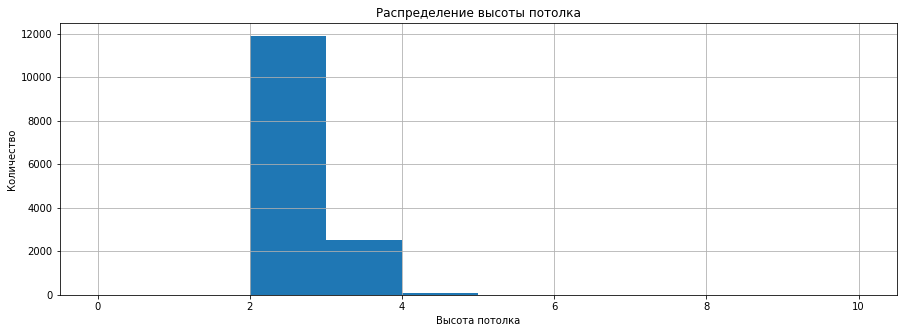

In [160]:
df['ceiling_height'].hist(bins=10, range=(0,10), figsize=(15,5))
plt.title('Распределение высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
plt.show()

Посмотрим количество значений выше 5

In [67]:
len(df.query('ceiling_height > 5'))

16

Можно заменить их так же медианой

In [68]:
df.loc[(df['ceiling_height'] > 5), 'ceiling_height'] = median_h

In [69]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.725507
std          0.270588
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

##### balcony

In [70]:
df['balcony'].describe()

count    12137.000000
mean         1.153003
std          1.071169
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [71]:
len(df[df['balcony'].isna()])

11513

Скорее всего, значения пропущены там, где балконов нет  
Заменим нулем, а также преобразуем тип

In [72]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

#### Расположение значимых объектов

##### airports_nearest

In [73]:
df['airports_nearest'].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [74]:
len(df[df['airports_nearest'].isna()])

5534

In [75]:
df.query('airports_nearest == 0')

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,is_apartment,open_plan,ceiling_height,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
21085,Санкт-Петербург,7.0,2018-09-23,60.0,0,1,3,9,34.7,19.8,...,False,False,2.7,2,0.0,22801.0,0.0,NaN,0.0,NaN


Т.к неясно, где именно расположена квартира, восстановить значение не получится  
Заменим медианным

In [76]:
median_a = df['airports_nearest'].median()
df.loc[(df['airports_nearest'] == 0), 'airports_nearest'] = median_a

Пропущенные значения также не поддаются восстановлению, имеет смысл их оставить

##### city_centers_nearest

In [77]:
df['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [78]:
len(df[df['city_centers_nearest'].isna()])

5511

In [79]:
len(df.query('locality_name == "Санкт-Петербург" and city_centers_nearest.isna()'))

61

В Петербурге всего 61 квартира, у которой не указано расстояние до центра  
Имеет смысл не учитывать эти данные в анализе

##### parks_around_3000

In [80]:
df['parks_around_3000'].describe()

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [81]:
len(df[df['parks_around_3000'].isna()])

5510

От нуля до трех парков рядом  
Заменим пропущенные значения нулем и преобразуем тип данных

In [82]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(0).astype(int)

##### parks_nearest

In [83]:
df['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [84]:
len(df[df['parks_nearest'].isna()])

15586

Значения от 1 до 3190, при этом много пропусков  
Видимо, данные не указаны там, где до парков дальше 3 километров  
Заменим пропуски на 4000 и рассмотрим минимальные значения

In [85]:
df['parks_nearest'] = df['parks_nearest'].fillna(4000)

##### ponds_around_3000

In [86]:
df['ponds_around_3000'].describe()

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [87]:
len(df[df['ponds_around_3000'].isna()])

5510

Ситуация как с парками  
Заменим пропущенные значения нулем и преобразуем тип данных

In [88]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(0).astype(int)

##### ponds_nearest

In [89]:
df['ponds_nearest'].describe()

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [90]:
len(df[df['ponds_nearest'].isna()])

14565

Значения от 13 до 1344, при этом много пропусков  
Видимо, как и с парками, данные не указаны там, где до водоема слишком далеко  
Заменим пропуски на 4000 и изменим тип данных

In [91]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(4000).astype(int)

### Обработка дубликатов

In [92]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [93]:
len(df['locality_name'].unique())

364

Вряд ли конкретные названия типов населенных пунктов важны, тем более, явно дублируются "поселок" и "посёлок"

In [94]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [95]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

In [96]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции ', '')
df['locality_name'] = df['locality_name'].str.replace('поселок станции ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')

In [97]:
len(df['locality_name'].unique())

318

Было 364 населенных пункта, осталось 318

И на всякий случай проверим дубликаты по всему датафрейму

In [98]:
df.duplicated().sum()

0

## Расчёты и добавление результатов в таблицу

Посчитайте и добавьте в таблицу
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Цены

Цена квадратного метра является отношением общей стоимости жилья к общей площади

In [99]:
df['square_meter_price'] = (1000000 * df['last_price'] / df['total_area']).astype(int)

### Даты

Так как ранее мы преобразовали день публикации в тип datetime, очень легко извлечь из него необходимые данные

In [100]:
df['day_of_week'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

### Этажи

В этом разделе проведем категоризацию данных  
Первому этажу присвоим категорию 1, последнему 3, а другие этажи будут в категории 2

In [101]:
def category(row): #функция, возвращающая значение категории
    floor = row['floor']
    last = row['floors_total']
    
    if floor == 1:
        return 1
    elif floor == last:
        return 2
    else:
        return 3

In [102]:
df['floor_type'] = df.apply(category, axis=1) 

In [103]:
df['floor_type'].value_counts()

3    17326
2     3412
1     2912
Name: floor_type, dtype: int64

### Площади

Соотношения площадей вычисляются легко, но выше были неизвестные значения площади кухни и жилой площади были заменены на нули  
Т.к эти нули находятся в числителе, деление произойдет без ошибок, но в результате будет 0

In [104]:
df['living_area_part'] = df['living_area'] / df['total_area']
df['kitchen_area_part'] = df['kitchen_area'] / df['total_area']

Оценим, сколько таких квартир

In [105]:
len(df[df['living_area_part'] == 0]) #квартиры без указанной жилой площади

1898

In [106]:
len(df[df['kitchen_area_part'] == 0]) #квартиры без указанной площади квартиры

2269

In [107]:
len(df[(df['living_area_part'] == 0) & (df['kitchen_area_part'] == 0)])
 #квартиры без указанных жилой площади и площади квартиры

1460

Оценим общий результат

In [108]:
df.head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,parks_nearest,ponds_around_3000,ponds_nearest,square_meter_price,day_of_week,month,year,floor_type,living_area_part,kitchen_area_part
0,Санкт-Петербург,13.000,2019-03-07,NaN,20,3,8,16,108.0,51.0,...,482.0,2,755,120370,3,3,2019,3,0.472222,0.231481
1,Шушары,3.350,2018-12-04,81.0,7,1,1,11,40.4,18.6,...,4000.0,0,4000,82920,1,12,2018,1,0.460396,0.272277
2,Санкт-Петербург,5.196,2015-08-20,558.0,10,2,4,5,56.0,34.3,...,90.0,2,574,92785,3,8,2015,3,0.612500,0.148214
3,Санкт-Петербург,64.900,2015-07-24,424.0,0,3,9,14,159.0,0.0,...,84.0,3,234,408176,4,7,2015,3,0.000000,0.000000
4,Санкт-Петербург,10.000,2018-06-19,121.0,2,2,13,14,100.0,32.0,...,112.0,1,48,100000,1,6,2018,3,0.320000,0.410000


## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

#### rooms

Исследуем столбец rooms

In [109]:
df['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Построим гистограмму

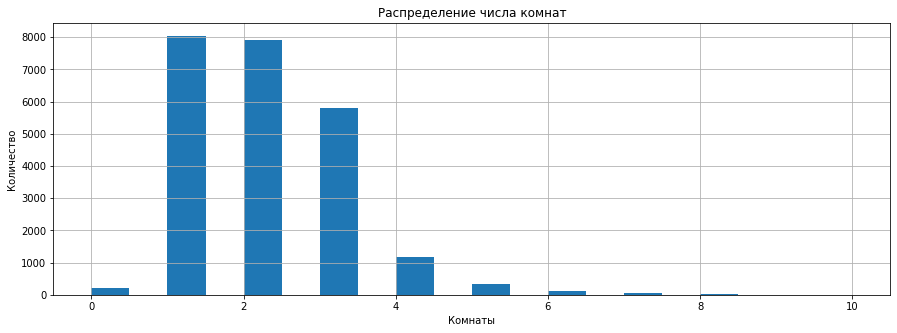

In [157]:
df['rooms'].hist(bins=20, figsize=(15,5), range=(0,10))
plt.title('Распределение числа комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество')
plt.show()

In [111]:
len(df[df['rooms'] > 4])

521

Количество комнат больше 4 можно считать выбросами

#### total_area

In [112]:
df['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

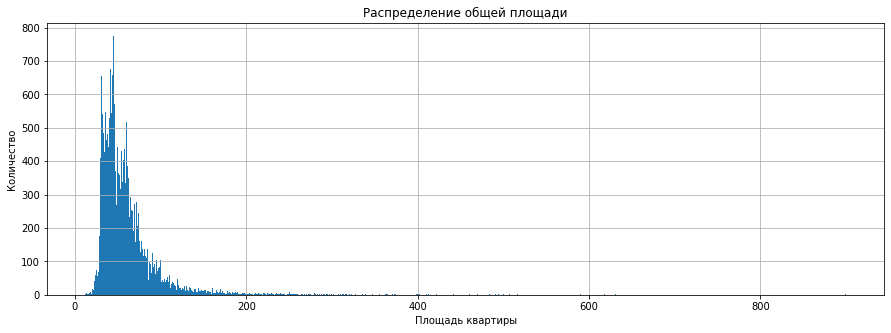

In [161]:
df['total_area'].hist(bins=900,figsize=(15,5))
plt.title('Распределение общей площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество')
plt.show()

In [114]:
len(df[df['total_area'] > 150])

562

Площадь квартиры больше 150 можно считать выбросами

#### last_price

In [115]:
df['last_price'].describe()

count    23650.000000
mean         6.541642
std         10.896378
min          0.430000
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

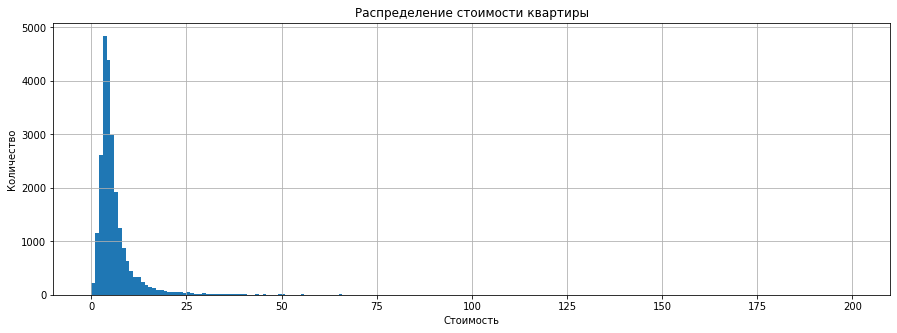

In [162]:
df['last_price'].hist(bins=200,figsize=(15,5), range=(0,200))
plt.title('Распределение стоимости квартиры')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
plt.show()

In [117]:
len(df[df['last_price'] > 25])

464

Стоимость квартиры больше 25 млн можно считать выбросами

#### ceiling_height

In [118]:
df['ceiling_height'].describe()

count    14490.000000
mean         2.725507
std          0.270588
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height, dtype: float64

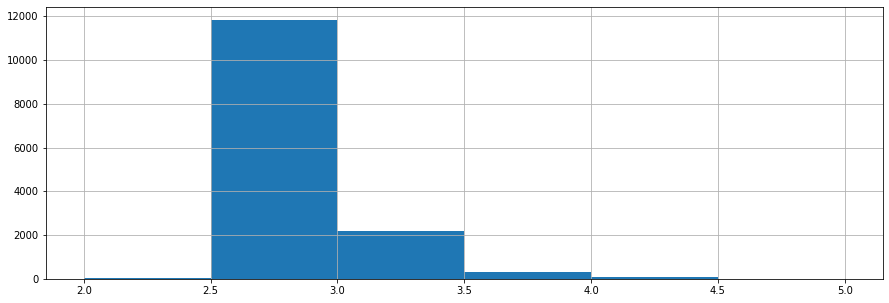

In [119]:
df['ceiling_height'].hist(bins=6,figsize=(15,5), range=(2,5))
plt.title('Распределение высоты потолка')
plt.xlabel('Высота потолка')
plt.ylabel('Количество')
plt.show()

In [120]:
len(df[df['ceiling_height'] > 3.5])

266

In [121]:
len(df[df['ceiling_height'] < 2.5])

59

Высоту потолка ниже 2.5 и выше 3.5 можно считать выбросами

### Изучение время продажи квартиры

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [123]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

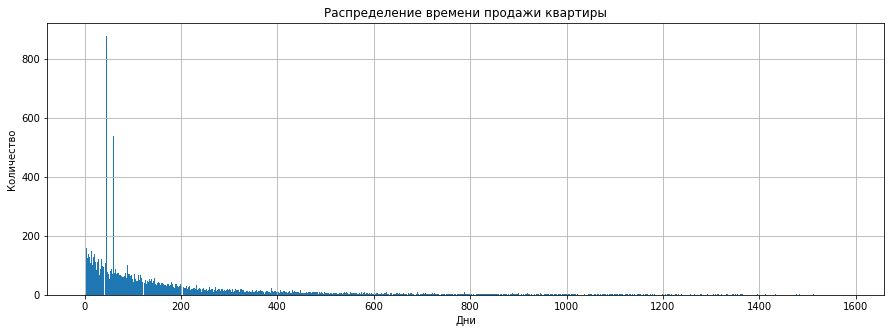

In [163]:
df['days_exposition'].hist(bins=1618,figsize=(15,5))
plt.title('Распределение времени продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

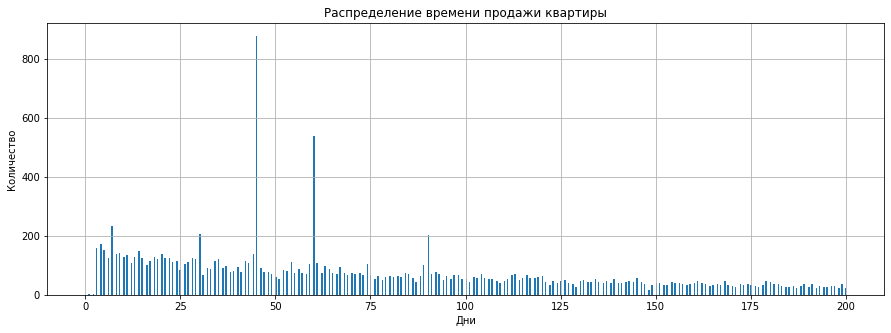

In [164]:
df['days_exposition'].hist(bins=500,figsize=(15,5), range=(0,200))
plt.title('Распределение времени продажи квартиры')
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.show()

In [126]:
100 * len(df[df['days_exposition'] > 365]) / len(df['days_exposition'])

12.900634249471459

In [127]:
100 * (len(df[df['days_exposition'] > 730]) / len(df['days_exposition']))

3.171247357293869

* Среднее время продажи квартиры 186 дней (6 месяцев)
* Медианное время продажи квартиры 94 дня (3 месяца)
* Максимальное время продажи квартиры 1580 дней (больше 4 лет)
* Есть два пика - около 1.5 и 2 месяцев
* Также есть небольшие пики около недели, месяца и трех месяцев
* Очень быстрой продажей можно считать срок меньше 1.5 месяцев
* Больше года продается 12.9% квартир
* Срок продажи более двух лет (3.17%) можно считать выбросами

### Удаление редких и выбивающихся значений

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Можно убрать выбросы, установленные в разделе 4.1

In [128]:
df_clean = df.query(   
    ('ceiling_height <= 3.5' or 'ceiling_height >= 2.5') and
    'rooms <= 4' and
    'total_area <= 150' and
    'last_price <= 25'
                   )
100 * len(df_clean.index) / len(df.index)

98.03805496828753

Устранено 2% выбросов

### Изучение факторов, влияющих на стоимость квартиры

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

#### Зависимость между ценой и площадью квартиры

In [129]:
df_clean['last_price'].corr(df_clean['total_area'])

0.7824903480019486

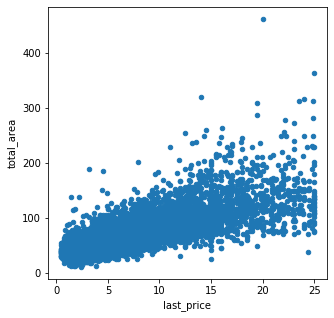

In [130]:
df_clean.plot(x='last_price', y='total_area', kind='scatter', figsize=(5,5))

Довольно сильная зависимость между ценой и площадью квартиры

#### Зависимость между ценой и количеством комнат

In [131]:
df_clean['last_price'].corr(df_clean['rooms'])

0.5199342013301682

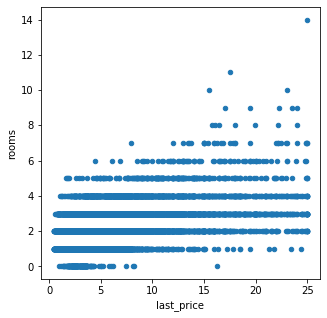

In [132]:
df_clean.plot(x='last_price', y='rooms', kind='scatter', figsize=(5,5))

Взаимосвязь есть, но не очень сильная

#### Зависимость между ценой и расстоянием до центра

In [133]:
df_clean['last_price'].corr(df_clean['city_centers_nearest'])

-0.35221766286652917

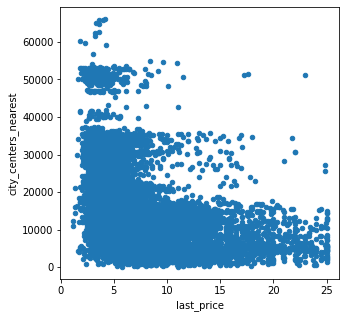

In [134]:
df_clean.plot(x='last_price', y='city_centers_nearest', kind='scatter', figsize=(5,5))

Слабая обратная взаимосвязь

#### Зависимость между ценой и днем недели публикации объявления

In [135]:
df_clean['last_price'].corr(df_clean['day_of_week'])

-0.015237717552728333

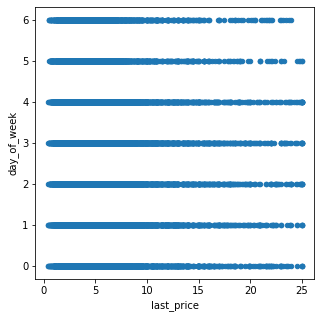

In [136]:
df_clean.plot(x='last_price', y='day_of_week', kind='scatter', figsize=(5,5))

Связь отсутствует

#### Зависимость между ценой и годом публикации объявления

In [137]:
df_clean['last_price'].corr(df_clean['year'])

-0.03308872603983384

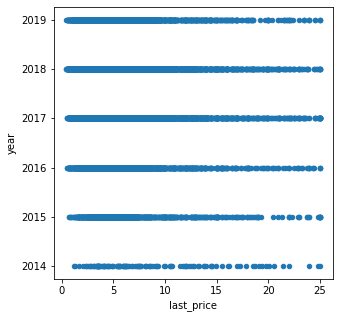

In [138]:
df_clean.plot(x='last_price', y='year', kind='scatter', figsize=(5,5))

Связь отсутствует

#### Зависимость между ценой и месяцем публикации объявления

In [139]:
df_clean['last_price'].corr(df_clean['month'])

-4.474919881560762e-05

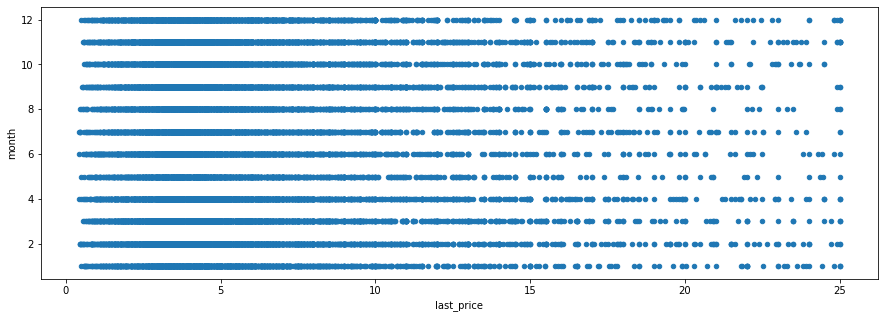

In [140]:
df_clean.plot(x='last_price', y='month', kind='scatter', figsize=(15,5))

Связь отсутствует

#### Зависимость между ценой и этажом

In [141]:
df_clean['last_price'].corr(df_clean['floor_type'])

0.12068370580006295

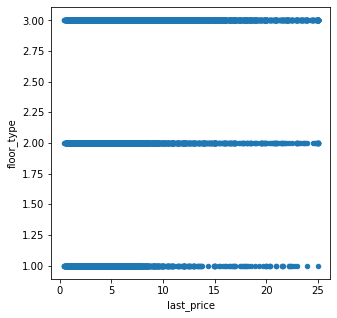

In [142]:
df_clean.plot(x='last_price', y='floor_type', kind='scatter', figsize=(5,5))

Связь практически отсутствует

### Изучение населённых пунктов с наибольшим числом объявлений

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [143]:
top_cities = df.groupby('locality_name')['square_meter_price'].count().sort_values(ascending=False).head(10).index.tolist()
top_cities

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [144]:
top_price = df_clean.query('locality_name in @top_cities').groupby('locality_name')['square_meter_price'].mean().sort_values(ascending=False)
top_price

locality_name
Санкт-Петербург    109740.336172
Пушкин             102151.113260
Кудрово             95324.472458
Парголово           90175.486239
Мурино              86087.054237
Шушары              78676.902273
Колпино             75332.866469
Гатчина             68745.690554
Всеволожск          68654.007538
Выборг              58141.489451
Name: square_meter_price, dtype: float64

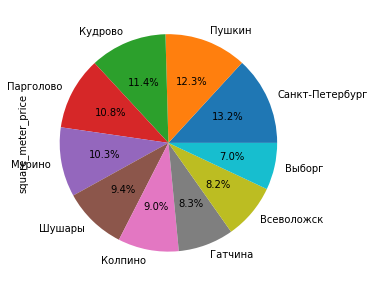

In [145]:
top_price.plot(x='locality_name', y=top_price.index, kind='pie', figsize=(5,5), autopct='%1.1f%%')

Ожидаемо, самая высокая стоимость метра в Санкт-Петербурге  
На втором месте город Пушкин (крупный город, считается территорией Петербурга)  
Потом идут ближайшие пригороды и крупные города недалеко от Петербурга  
Самая низкая стоимость жилья в Выборге, городе "с историей", но далеко от метрополии

###  Выделение квартир в Санкт-Петербурге и определение границ центра

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [146]:
df_spb = df_clean.query('locality_name == "Санкт-Петербург"').dropna(subset=['city_centers_nearest'])
df_spb['city_centers_km'] = (df_spb['city_centers_nearest'] / 1000).astype(int)
df_spb.head()

,locality_name,last_price,first_day_exposition,days_exposition,total_images,rooms,floor,floors_total,total_area,living_area,...,ponds_around_3000,ponds_nearest,square_meter_price,day_of_week,month,year,floor_type,living_area_part,kitchen_area_part,city_centers_km
0,Санкт-Петербург,13.000,2019-03-07,NaN,20,3,8,16,108.0,51.0,...,2,755,120370,3,3,2019,3,0.472222,0.231481,16
2,Санкт-Петербург,5.196,2015-08-20,558.0,10,2,4,5,56.0,34.3,...,2,574,92785,3,8,2015,3,0.612500,0.148214,13
4,Санкт-Петербург,10.000,2018-06-19,121.0,2,2,13,14,100.0,32.0,...,1,48,100000,1,6,2018,3,0.320000,0.410000,8
7,Санкт-Петербург,7.915,2019-04-18,NaN,5,2,22,24,71.6,0.0,...,0,4000,110544,3,4,2019,3,0.000000,0.263966,11
9,Санкт-Петербург,5.400,2017-02-26,289.0,18,3,7,9,61.0,43.6,...,0,4000,88524,6,2,2017,3,0.714754,0.106557,15


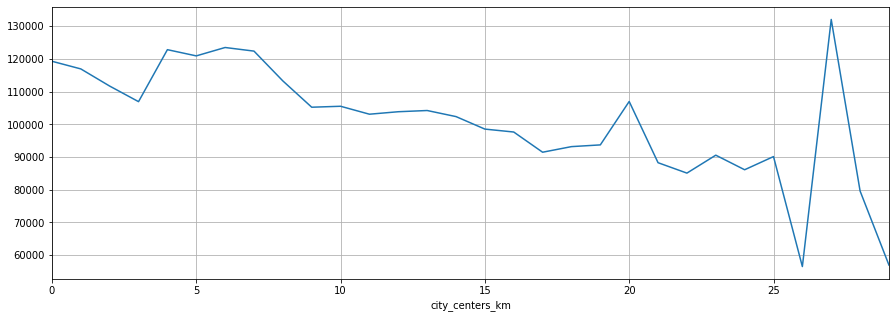

In [147]:
df_spb.groupby('city_centers_km')['square_meter_price'].median().plot(
    x='city_centers_km', y=df_spb.index, kind='line', figsize=(15,5), grid=True)

График плавно идет вниз до точки 3 км, после этого "скачет" в разных точках, видимо, там стоимость кв.м. зависит от каких-то других параметров

### Изучение квартир в центре Санкт-Петербурга

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

#### Выделим необходимые параметры в отдельные таблицы для центра Петербурга и зоны вне центра

In [169]:
spb_center = df_spb.query('city_centers_km <= 3').loc[:, [
    'total_area', 'last_price', 'square_meter_price', 'rooms', 
    'ceiling_height', 'year', 'floor', 'floor_type', 'city_centers_km']]

spb = df_spb.query('city_centers_km > 3').loc[:, [
    'total_area', 'last_price', 'square_meter_price', 'rooms', 
    'ceiling_height', 'year', 'floor', 'floor_type', 'city_centers_km']]

In [170]:
spb_center.head()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
24,97.2,6.5,66872,2,NaN,2015,1,1,2
35,149.0,15.5,104026,5,NaN,2017,4,3,3
99,90.0,9.6,106666,4,NaN,2017,2,3,2
136,51.8,6.5,125482,2,3.45,2018,2,3,3
138,40.0,4.8,120000,2,NaN,2017,2,3,2


In [167]:
spb.head()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
0,108.0,13.000,120370,3,2.70,2019,8,3,16
2,56.0,5.196,92785,2,NaN,2015,4,3,13
7,71.6,7.915,110544,2,NaN,2019,22,3,11
9,61.0,5.400,88524,3,2.50,2017,7,3,15
10,39.6,5.050,127525,1,2.67,2017,3,3,13


#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков

In [168]:
spb_center.describe()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
count,3975.000000,3975.000000,3975.000000,3975.000000,2590.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,77.646008,9.442412,124760.305660,2.570314,3.013660,2017.220377,4.380881,2.608302,4.824654
std,36.553258,4.770048,39268.549525,1.244424,0.341658,1.107797,3.215751,0.681395,2.122612
min,12.000000,1.600000,15345.000000,0.000000,2.400000,2014.000000,1.000000,1.000000,0.000000
25%,50.950000,5.990000,97757.500000,2.000000,2.750000,2017.000000,2.000000,2.000000,3.000000
50%,70.800000,8.250000,117848.000000,2.000000,3.000000,2017.000000,4.000000,3.000000,5.000000
75%,95.000000,11.800000,142484.000000,3.000000,3.200000,2018.000000,5.000000,3.000000,7.000000
max,363.000000,25.000000,600000.000000,14.000000,4.800000,2019.000000,24.000000,3.000000,8.000000


In [152]:
spb.describe()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
count,14171.000000,14171.000000,14171.000000,14171.000000,9053.000000,14171.000000,14171.000000,14171.000000,14171.000000
mean,58.890296,6.437125,108797.885823,2.050596,2.713602,2017.370334,6.489521,2.685273,11.955896
std,27.202197,3.648398,28280.834165,1.008668,0.238879,1.042989,5.008118,0.644849,4.210980
min,13.000000,1.190000,15345.000000,0.000000,2.300000,2014.000000,1.000000,1.000000,4.000000
25%,41.000000,4.100000,90343.000000,1.000000,2.540000,2017.000000,3.000000,3.000000,9.000000
50%,52.000000,5.250000,103448.000000,2.000000,2.650000,2017.000000,5.000000,3.000000,12.000000
75%,69.800000,7.400000,121346.500000,3.000000,2.800000,2018.000000,9.000000,3.000000,15.000000
max,460.800000,25.000000,600000.000000,14.000000,4.700000,2019.000000,33.000000,3.000000,29.000000


**Площади квартир**  
Для минимальных значений различий почти нет, максимальная площадь значительно отличается в пользу периферии  
При этом по остальным показателям квартиры в центре больше по площади

|Значение    |Центр     |Периферия|
|------------|----------|---------|
|Среднее     |86.9      |58.9     |
|Минимальное |12        |13       |
|25% квартиль|60.2      |41       |
|Медианное   |80        |52       |
|75% квартиль|105       |69.8     |
|Максимальное|281.1     |460.8    |



**Стоимость квартир**  
Ожидаемо, стоимость квартир в центре выше, чем на периферии (максимальное - после отбрасывания выбросов)

|Значение    |Центр     |Периферия|
|------------|----------|---------|
|Среднее     |10.1      |6.4      |
|Минимальное |2.1       |1.2      |
|25% квартиль|6.8       |4.1      |
|Медианное   |9         |5.3      |
|75% квартиль|12.5      |7.4      |
|Максимальное|25        |25       |



**Стоимость квадратного метра**  
Стоимость квадратного метра в центре выше, но значения в 25%-50%-75% квартилях не так уж сильно различаются

|Значение    |Центр     |Периферия|
|------------|----------|---------|
|Среднее     |121 580   |108 797  |
|Минимальное |29 919    |15 345   |
|25% квартиль|93 564    |90 343   |
|Медианное   |111 588   |103 448  |
|75% квартиль|136 442   |121 364  |
|Максимальное|387 096   |600 000  |



**Число комнат**  
Комнат в центре Петербурга продается на одну больше (странно, что максимальное 11 и 14, удаляли же эти значения)

|Значение    |Центр     |Периферия|
|------------|----------|---------|
|Среднее     |3         |2        |
|Минимальное |0         |0        |
|25% квартиль|2         |1        |
|Медианное   |3         |2        |
|75% квартиль|4         |3        |
|Максимальное|11        |14       |



**Высота потолков**  
Также квартиры в центре закономерно выше (старый фонд)

|Значение    |Центр   |Периферия|
|------------|--------|---------|
|Среднее     |3.17    |2.71     |
|Минимальное |2.45    |2.3      |
|25% квартиль|3       |2.54     |
|Медианное   |3.13    |2.65     |
|75% квартиль|3.4     |2.8      |
|Максимальное|4.8     |4.7      |



#### Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)

In [153]:
spb_center.corr()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
total_area,1.000000,0.712248,-0.272044,0.805987,0.186717,-0.077303,0.159803,0.167738,-0.045839
last_price,0.712248,1.000000,0.418180,0.500609,0.214197,-0.016530,0.180775,0.185310,-0.117559
square_meter_price,-0.272044,0.418180,1.000000,-0.320448,0.080942,0.090386,0.045960,0.057425,-0.119693
rooms,0.805987,0.500609,-0.320448,1.000000,0.094601,-0.055523,0.107840,0.117098,-0.039945
ceiling_height,0.186717,0.214197,0.080942,0.094601,1.000000,-0.018599,-0.064768,0.178080,-0.090870
year,-0.077303,-0.016530,0.090386,-0.055523,-0.018599,1.000000,-0.001079,-0.023269,0.077998
floor,0.159803,0.180775,0.045960,0.107840,-0.064768,-0.001079,1.000000,0.263848,0.106760
floor_type,0.167738,0.185310,0.057425,0.117098,0.178080,-0.023269,0.263848,1.000000,0.039952
city_centers_km,-0.045839,-0.117559,-0.119693,-0.039945,-0.090870,0.077998,0.106760,0.039952,1.000000


In [154]:
spb.corr()

,total_area,last_price,square_meter_price,rooms,ceiling_height,year,floor,floor_type,city_centers_km
total_area,1.000000,0.822243,0.038945,0.787499,0.442579,-0.079045,-0.004719,0.015697,-0.246540
last_price,0.822243,1.000000,0.550522,0.542014,0.495287,-0.017939,0.062200,0.086435,-0.362058
square_meter_price,0.038945,0.550522,1.000000,-0.190139,0.284046,0.108734,0.147667,0.156000,-0.336715
rooms,0.787499,0.542014,-0.190139,1.000000,0.229445,-0.043169,-0.149552,-0.070235,-0.187024
ceiling_height,0.442579,0.495287,0.284046,0.229445,1.000000,-0.107545,-0.028954,0.006565,-0.438345
year,-0.079045,-0.017939,0.108734,-0.043169,-0.107545,1.000000,0.003094,0.015287,0.063188
floor,-0.004719,0.062200,0.147667,-0.149552,-0.028954,0.003094,1.000000,0.259043,0.166776
floor_type,0.015697,0.086435,0.156000,-0.070235,0.006565,0.015287,0.259043,1.000000,0.016511
city_centers_km,-0.246540,-0.362058,-0.336715,-0.187024,-0.438345,0.063188,0.166776,0.016511,1.000000


**Число комнат**  
* Для центра города средняя корреляция для общей цены (0.5) и небольшая отрицательная (-0.32) для стоимости квадратного метра  
* Для периферии ситуация аналогичная, разве что чуть выше корреляция для общей цены (0.54) и ниже - для кв.м. (-0.19)




**Этаж**  
* Для центра города незначительная корреляция для общей цены (0.18-0.19) и практически отсутствует (0.05-0.06) для стоимости квадратного метра  
* Для периферии ситуация похожа, для общей цены 0.15-0.16 и для кв.м. 0.06-0.09




**Расстояние до центра**  
* Для центра города и для общей стоимости, и для стоимости кв.м. незначительная отрицательная корреляция -0.11
* Для периферии небольшая отрицательная корреляция -0.35




**Дата размещения**  
* Для центра города связи между ценой и годом размещения, как ни странно, практически нет (-0.02 для общей цены и 0.09 для цены кв.м)  
* Для периферии ситуация такая же, 0.02 для общей цены и 0.11 для цены кв.м

## Общий вывод

* Стоимость квартир в Санкт-Петербурге выше стоимости квартир в области, удаленность от города также влияет на цену
* В центре города харатерны более высокие потолки и сами квартиры больше (как по площади, так и по комнатам)
* Наблюдается довольно сильная зависимость между ценой и площадью квартиры, средняя - между ценой и количеством комнат
* Среднее время продажи квартиры полгода, медианное - 3 месяца
* Взаимосвязь между расстоянием до центра - небольшая обратная (т.е. чем ближе к центру, тем выше стоимость - что кажется логичным)
* Как ни странно, взаимосвязь между годом публикации объявления и стоимостью практически отсутствует